In [1]:
import random
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from readData import *
from nearNeighbors import *
from localBKG import *
from scipy import stats
from bestBkg import *
from astropy import stats
import healpy as hp
from nearNeighborsHEALPix import *
from localBKG_and_interlopersHEALPix import *
import healpy as hpy

In [2]:
# Define all relevant physical variables needed throughout the program, including:
# - number of LRG sources
# - number of survey (non-LRG) sources
# - coordinates for LRGs
# - coordinates for survey sources
# - projected radius from LRGs
# - LRG redshift
# - gmag and rmag for survey sources
# - gmag and rmag for LRGs
# - (g-r) color survey sources
# - (g-r) color for LRGs

# Number of LRG sources
lrg = 25

# Number of survey (non-LRG) sources
survey = 500

# Fake coordinates for LRG sources
random.seed(1)
x0 = [np.random.uniform(0,5) for j in range(lrg)]

random.seed(2)
y0 = [np.random.uniform(0,5) for j in range(lrg)]

# y0 = random.sample(y0, len(y0))
print("length of fake LRG sources (ra) = ", len(x0))
print("length of fake LRG sources (dec) = ", len(y0))
# print("x0 = ", x0)
# print("y0 = ", y0)
# print(type(y0))

# Fake coordinates for survey sources
random.seed(3)
x1 = [np.random.uniform(0,5) for j in range(survey)]

random.seed(4)
y1 = [np.random.uniform(0,5) for j in range(survey)]
# y1 = random.sample(y1, len(y1))
    
print("length of fake survey sources (ra) = ", len(x1))
print("length of fake survey sources (dec) = ", len(y1))    

# In order for there to be at least one guaranteed satellite, combine the survey and lrg position arrays so that one
# survey source position is the same as an LRG position
x_plus = np.concatenate([x0, x1])
y_plus = np.concatenate([y0, y1])

# print("length of x_plus (ra) (lrgs + survey) =", len(x_plus))
# print("length of y_plus (dec) (lrg + survey) =", len(y_plus))

# Redshift for LRG 
random.seed(0.2)
z = [np.random.uniform(0.1,0.5) for j in range(lrg)]
    
print("length of array of redshifts for fake LRGs =", len(z))
print("max z = ", np.amax(z))
print("min z = ", np.amin(z))

# Magnitudes for survey sources
# random.seed(15)
# gmag_plus = [np.random.uniform(14,29) for j in range(len(x_plus))]
# random.seed(16)
# rmag_plus = [np.random.uniform(13,24) for j in range(len(x_plus))]

# gmag_plus = np.array(gmag_plus)
# rmag_plus = np.array(rmag_plus)
# color_plus = gmag_plus - rmag_plus
    
# print("length of gmag for survey soruces =", len(gmag_plus))
# print("length of rmag for survey soruces =", len(rmag_plus))
# print("max gmag_plus = ", np.amax(gmag_plus))
# print("min gmag_plus = ", np.amin(gmag_plus))
# print("max rmag_plus = ", np.amax(rmag_plus))
# print("min rmag_plus = ", np.amin(rmag_plus))
# print("length of color_plus = ", len(color_plus))
# print("max color = ", np.amax(color_plus))
# print("min color = ", np.amin(color_plus))

random.seed(15)
gmag_survey = [np.random.uniform(14,29) for j in range(len(x1))]
random.seed(16)
rmag_survey = [np.random.uniform(13,24) for j in range(len(x1))]

gmag_survey = np.array(gmag_survey)
rmag_survey = np.array(rmag_survey)
color_survey = gmag_survey - rmag_survey
    
print("length of gmag for survey soruces =", len(gmag_survey))
print("length of rmag for survey soruces =", len(rmag_survey))
print("max color = ", np.amax(color_survey))
print("min color = ", np.amin(color_survey))

# Magnitudes for LRG sources
random.seed(20)
gmag_lrg = [np.random.uniform(17,23) for j in range(lrg)]
random.seed(21)
rmag_lrg = [np.random.uniform(16,21) for j in range(lrg)]
    
print("length of gmag for survey soruces =", len(gmag_lrg))
print("length of rmag for survey soruces =", len(rmag_lrg))
print("max gmag_lrg = ", np.amax(gmag_lrg))
print("min gmag_lrg = ", np.amin(gmag_lrg))
print("max rmag_lrg = ", np.amax(rmag_lrg))
print("min rmag_lrg = ", np.amin(rmag_lrg))

gmag_lrg = np.array(gmag_lrg)
rmag_lrg = np.array(rmag_lrg)
color_lrg = gmag_lrg - rmag_lrg
print("length of color_lrg = ", len(color_lrg))

# distance = 0.5 # in Mpc
# print("distance in Mpc =", distance)
# distance_kpc = distance * 10.**3. # in kpc
# print("distance in kpc = ", distance_kpc)

rmag_plus = np.concatenate([rmag_lrg, rmag_survey])
gmag_plus = np.concatenate([gmag_lrg, gmag_survey])

color_plus = gmag_plus - rmag_plus

print("max gmag_plus = ", np.amax(gmag_plus))
print("min gmag_plus = ", np.amin(gmag_plus))
print("max rmag_plus = ", np.amax(rmag_plus))
print("min rmag_plus = ", np.amin(rmag_plus))
print("length of color_plus = ", len(color_plus))


length of fake LRG sources (ra) =  25
length of fake LRG sources (dec) =  25
length of fake survey sources (ra) =  500
length of fake survey sources (dec) =  500
length of array of redshifts for fake LRGs = 25
max z =  0.49124426624474327
min z =  0.10410251378525565
length of gmag for survey soruces = 500
length of rmag for survey soruces = 500
max color =  15.337752996188122
min color =  -9.150177184742292
length of gmag for survey soruces = 25
length of rmag for survey soruces = 25
max gmag_lrg =  22.903462151498925
min gmag_lrg =  17.85498504234137
max rmag_lrg =  20.502825746560962
min rmag_lrg =  16.53487933725509
length of color_lrg =  25
max gmag_plus =  28.957142566734362
min gmag_plus =  14.023812959663037
max rmag_plus =  23.99403261910142
min rmag_plus =  13.051243785942118
length of color_plus =  525


In [3]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z)

print("end cosmoCalc")

end cosmoCalc


In [4]:
row = 10
column = 10
rmag = np.concatenate([rmag_lrg, rmag_survey])
color = np.concatenate([color_lrg, color_survey])

xedges = np.array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])
yedges = np.array([-10., -8., -6., -4., -2., 0., 2., 4., 6., 8., 10., 12., 14., 16.]) 

# creates histogram for survey sources; excludes LRGs
H, xedges, yedges = np.histogram2d(rmag, color, normed=False)
# print("xedges: ", xedges)
# print("yedges: ", yedges)

# Uses the numbers counted in the histogram to calculate a surface density: For each cell, the number of sources
# divided by the area 
sd = H/(25.) # * (3600.**2.)) # converts square degrees to square arcseconds

In [5]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 256
npixel = hpy.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(x_plus)):
    theta.append(np.radians(90. - y_plus[i]))
    phi.append(np.radians(x_plus[i]))

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hpy.ang2pix(nside, theta, phi, nest=True)
# print('pixnums: ', pixnums)
# print(pixnums[0])
# print('length pixnums: ', len(pixnums))
# print('length ra: ', len(ra))


# Create a HEALPix map from pix
# mapp = np.bincount(pixnums, minlength=npixel)

# Plot mapp
# hpy.gnomview(mapp, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Density Map (nobs >= 2)')
# plt.show()

length phi:  525


In [6]:
# compare near neighbor functions using kdtree and HEALPix

distance = 0.5 # must be in Mpc

distance_kpc, near_kdtree, gal_tree, dist, index, num = nearNeighbor(distance, kpc_DA, x0, y0, x1, y1, rmag_lrg, rmag_survey, color_lrg, color_survey, xedges, yedges)

print('end nearNeighbor_kdtree')

indicesNEAR, near_HPIX = nearNeighborsHEALPix(distance_kpc, kpc_DA, x0, y0, nside, pixnums, rmag_plus, color_plus, xedges, yedges)

print('end nearNeighbor_HPIX')


end nearNeighbor_kdtree
end nearNeighbor_HPIX


In [8]:
print(len(index[0]))
print(len(indicesNEAR[0]))

0
3


mean number of near neighbors is 0.08
median number of near neighbors is 0.0
standard deviation of near neighbor is 0.2712931993250107
standard error is 0.05537749241945383


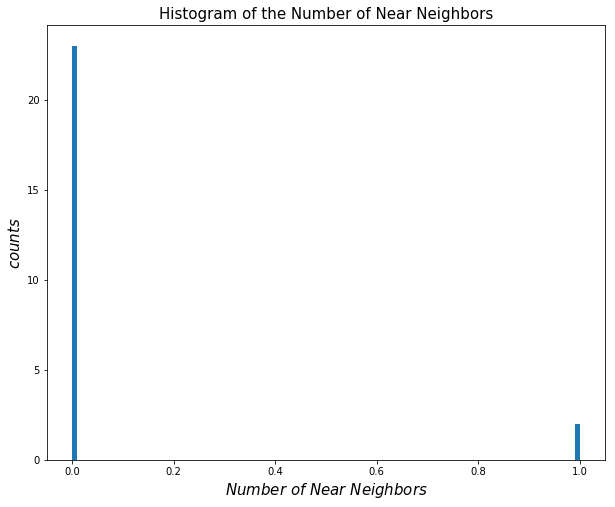

mean number of near neighbors is 2.0
median number of near neighbors is 2.0
standard deviation of near neighbor is 1.6
standard error is 0.32659863237109044


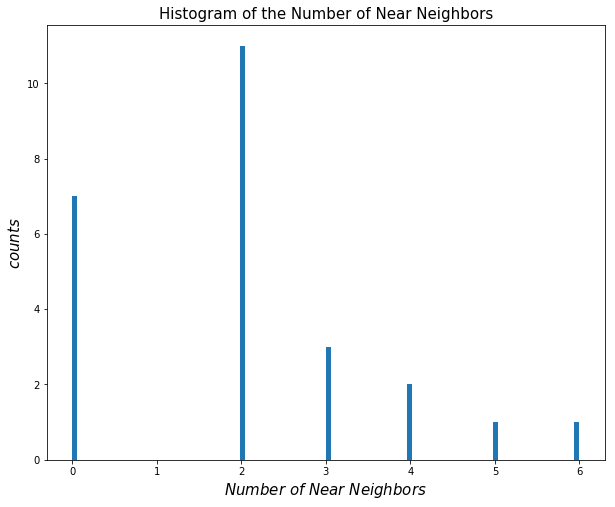

In [7]:
totalNear(near_kdtree)

plt.show()

totalNear(near_HPIX)

plt.show()


In [16]:
# compare interloper functions using kdtree and HEALPix

# kd tree

distance_r2 = 0.4 # in degree
distance_r3 = 0.5 # in degree

numbkg, med_local, sigma, omega, Nbkg_kdtree = localBKG_and_interlopers(distance_kpc, distance_r2, distance_r3, kpc_DA, x0, y0, x1, y1, rmag_lrg, rmag_survey, color_lrg, color_survey, xedges, yedges)

print("end bkg_kdtree")

# HEALPix

inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

Nbkg_HPIX, indicesBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, x0, y0, pixnums, rmag_plus, color_plus, xedges, yedges, distance_kpc, kpc_DA)

print("end bkg_HPIX")
    

25
end bkg_kdtree
end bkg_HPIX


In [18]:
# totalNbkg(Nbkg_kdtree)

# plt.show()

# totalNbkg(Nbkg_HPIX)

# plt.show()